# Example course exercise

On a mid-level bachelors' course, we plan to implement an exercise or project using Jupyter Notebooks.
The students could integrate these books into a website like this, to share with others.

![drawing](./DCG.png)


## A frost cracking example




In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

We are interested modeling the diffusion of heat in to rock.
To do this we need to set some parameters about the rock and the climate.

In [13]:
###########################
### physical parameters ###
###########################
α = 0.001 # Diffusion constant
MAT = 0.  # Mean annual air temperature
Tₐ = 12   # half of the annual temperature variation
py = 365  # 365 days per year



Next, we need to define some of the numerical parameters that are needed to run the model.

In [14]:
##############
### set up ###
##############
time_pts = [1, 91, 183, 273] # Time points we are interested in (julian days of year)
depths = np.flip(np.arange(0, 2.01, 0.001)) # Depths that we want to examine
all_days = np.arange(1, 366) # Days that we are intested ing.
crack_rng = [-3, -8] # Range of temperature where most cracking occurs.


Finally, we need to define a function where the physics is included

In [15]:
def T(z, t):
    return MAT + Tₐ * 10**(-z * np.sqrt(np.pi / (α * py))) * np.cos((2 * np.pi * t / py +np.pi) - z * np.sqrt(np.pi / (α * py)))


Now, let make a plot of it. We will include an shaded area where frost cracking is known to occur.

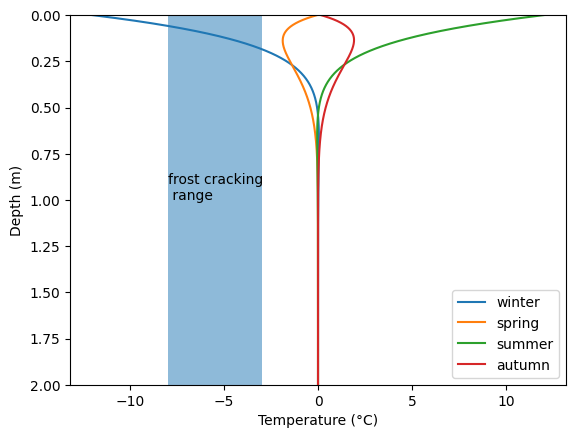

In [16]:
plt.figure("temperature plot")
plt.clf()

# Plot seasonal temperature variations
plt.plot(T(depths, time_pts[0]), depths, label="winter")
plt.plot(T(depths, time_pts[1]), depths, label="spring")
plt.plot(T(depths, time_pts[2]), depths, label="summer")
plt.plot(T(depths, time_pts[3]), depths, label="autumn")

# Highlight frost cracking range
plt.axvspan(crack_rng[1], crack_rng[0], alpha=0.5)
plt.text(crack_rng[1], 1, "frost cracking\n range")

plt.ylim([2, 0])
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.legend()


Now you can play with some of the parameters. What happens when the temperature is 2 degress colder? or the annual temperature variation is half of the original value

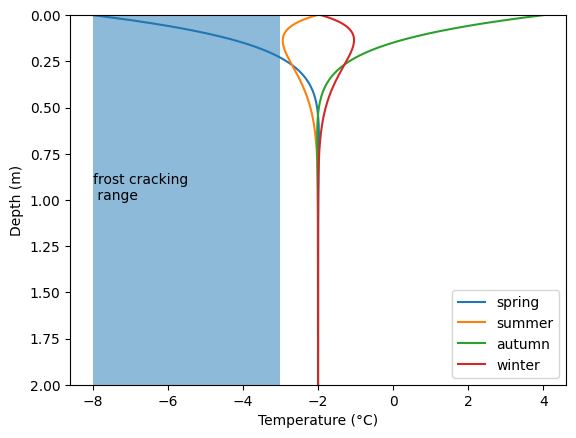

In [17]:
MAT = -2  # Mean Annual Air Temperature
Tₐ = 12   # half of the annual temperature variation
Tₐ = 12/2   # half of the annual temperature variation


plt.figure("temperature plot")
plt.clf()

# Plot seasonal temperature variations
plt.plot(T(depths, time_pts[0]), depths, label="spring")
plt.plot(T(depths, time_pts[1]), depths, label="summer")
plt.plot(T(depths, time_pts[2]), depths, label="autumn")
plt.plot(T(depths, time_pts[3]), depths, label="winter")

# Highlight frost cracking range
plt.axvspan(crack_rng[1], crack_rng[0], alpha=0.5)
plt.text(crack_rng[1], 1, "frost cracking\n range")

plt.ylim([2, 0])
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.legend()

